In [1]:
#import libs

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from torch.distributions.normal import Normal
import torch.multiprocessing as mp

import gymnasium as gym

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
plt.rcParams["figure.figsize"] = (10, 5)

cuda


In [2]:
#Khởi tạo môi trường

env_name = "InvertedPendulum-v4"
# Create and wrap the environment
env = gym.make(env_name)
wrapped_env = gym.wrappers.RecordEpisodeStatistics(env, 50)  # Records episode-reward

# Observation-space of InvertedPendulum-v4 (4)
obs_space_dims = env.observation_space.shape[0]
# Action-space of InvertedPendulum-v4 (1)
action_space_dims = env.action_space.shape[0]
rewards_over_seeds = []


In [3]:
#Tạo folder kết quả

import os
def mkdir(path): 
    if not os.path.exists(path):
        os.mkdir(path)

save_path = "./save"
env_path = f'{save_path}/{env_name}'
model_path = f'{save_path}/{env_name}/model'
demo_path = f'{save_path}/{env_name}/demo'

mkdir(save_path)
mkdir(env_path)
mkdir(model_path)
mkdir(demo_path)

In [6]:
# Import necessary libraries
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

# Set the seed and other training parameters
seed_set = [1]
total_num_episodes = 100000  # Total number of episodes
evaluation_interval = 1000
learning_rate = 7e-4

# Initialize an empty list to store rewards over different seeds
rewards_over_seeds = []

for seed in seed_set:
    # Set the random seed for reproducibility
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Initialize the SAC agent
    model = A2C("MlpPolicy", env, verbose=0, seed=seed, learning_rate=learning_rate)

    rewards = []

    for episode in range(0, total_num_episodes + 1, evaluation_interval):
        if episode > 0:
            # Continue training the agent
            model.learn(total_timesteps=evaluation_interval)

        # Evaluate the agent
        mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
        print(f"Seed: {seed}, Episode: {episode}, Mean Reward: {mean_reward}, Std Reward: {std_reward}")
        rewards.append((episode, mean_reward))

        # Save the model
        model.save(f"{model_path}/{env_name}_a2c_seed_{seed}_episode_{episode}")

    rewards_over_seeds.append(rewards)

# Output the rewards for different seeds
print(rewards_over_seeds)


/home/admin/miniconda3/envs/tue.cm210908/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Seed: 1, Episode: 0, Mean Reward: 23.1, Std Reward: 4.504442251822083
Seed: 1, Episode: 1000, Mean Reward: 141.5, Std Reward: 42.64563283620024
Seed: 1, Episode: 2000, Mean Reward: 58.4, Std Reward: 1.907878402833891
Seed: 1, Episode: 3000, Mean Reward: 66.1, Std Reward: 1.2206555615733703
Seed: 1, Episode: 4000, Mean Reward: 91.6, Std Reward: 3.7469987990390385
Seed: 1, Episode: 5000, Mean Reward: 51.4, Std Reward: 1.2806248474865698
Seed: 1, Episode: 6000, Mean Reward: 76.2, Std Reward: 1.469693845669907
Seed: 1, Episode: 7000, Mean Reward: 90.4, Std Reward: 3.6386810797320503
Seed: 1, Episode: 8000, Mean Reward: 454.8, Std Reward: 10.215674231297708
Seed: 1, Episode: 9000, Mean Reward: 1000.0, Std Reward: 0.0
Seed: 1, Episode: 10000, Mean Reward: 206.7, Std Reward: 1.9519221295943134
Seed: 1, Episode: 11000, Mean Reward: 1000.0, Std Reward: 0.0
Seed: 1, Episode: 12000, Mean Reward: 1000.0, Std Reward: 0.0
Seed: 1, Episode: 13000, Mean Reward: 1000.0, Std Reward: 0.0
Seed: 1, Episode

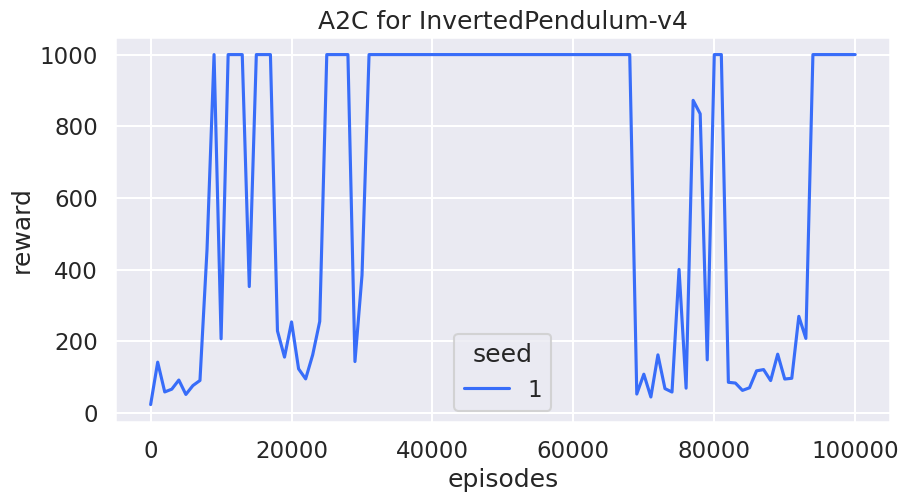

In [7]:
# ploting
rewards_to_plot = []
for seed_index, seed_rewards in enumerate(rewards_over_seeds):
    for episode, reward in seed_rewards:
        rewards_to_plot.append([seed_set[seed_index], episode, reward])
 
df1 = pd.DataFrame(rewards_to_plot, columns=["seed", "episodes", "reward"])
 
# Visualize the rewards
sns.set(style="darkgrid", context="talk", palette="rainbow")
sns.lineplot(x="episodes", y="reward", hue="seed", data=df1).set(
    title="A2C for InvertedPendulum-v4"
)
plt.show()